In [1]:
import os
os.getcwd()

'C:\\Users\\User'

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [71]:
data= pd.read_csv('loan_data_set.csv')

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploring the data #



In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [74]:
data.shape

(614, 13)

# working on missing values

In [75]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [77]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())   

In [78]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
data.dropna(inplace=True)

In [80]:
data.shape

(542, 13)

# Visualizations

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

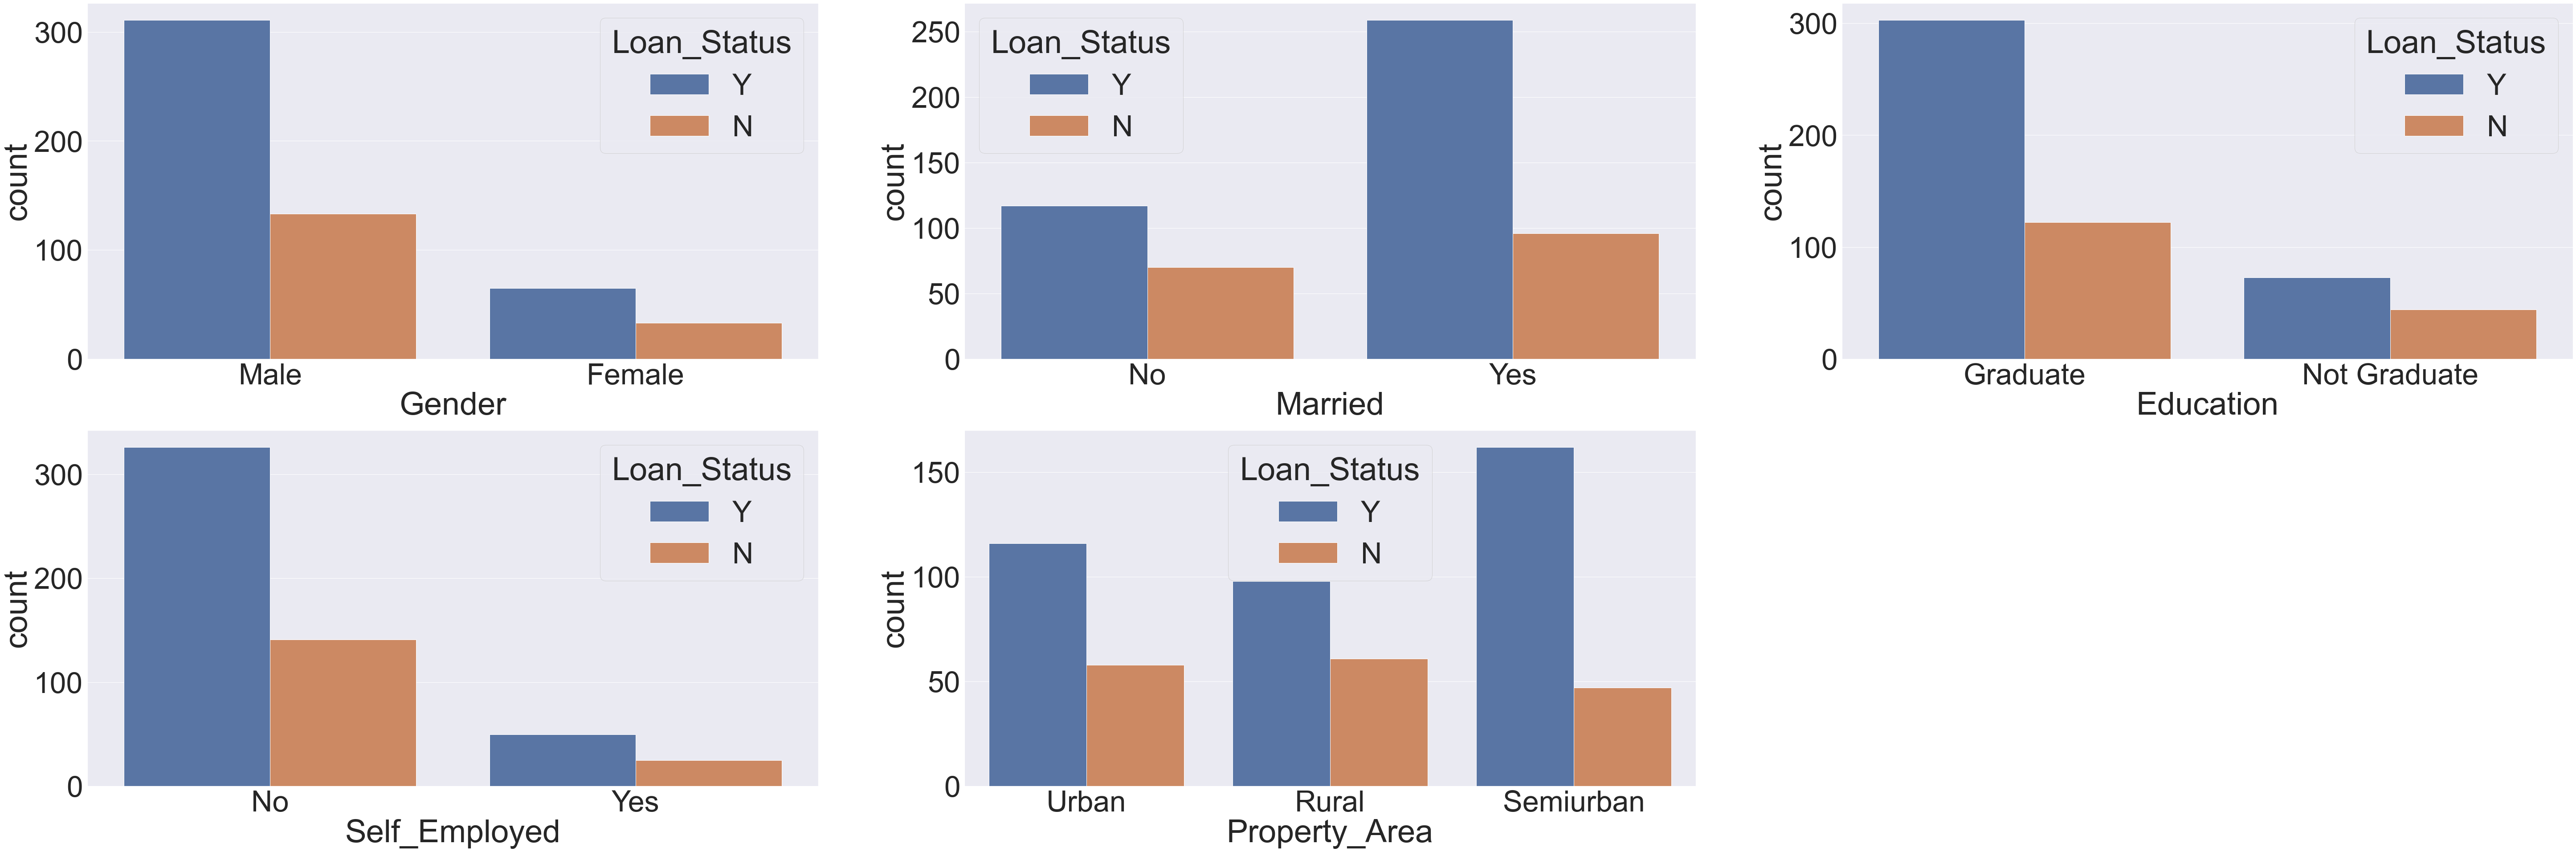

In [81]:
plt.figure(figsize=(100,50))
sns.set(font_scale=6)
plt.subplot(331)
sns.countplot(data['Gender'], hue=data['Loan_Status'])
plt.subplot(332)
sns.countplot(data['Married'], hue=data['Loan_Status'])
plt.subplot(333)
sns.countplot(data['Education'], hue=data['Loan_Status'])
plt.subplot(334)
sns.countplot(data['Self_Employed'], hue=data['Loan_Status'])
plt.subplot(335)
sns.countplot(data['Property_Area'], hue=data['Loan_Status'])

In [82]:
data['Loan_Status'].replace('Y', 1, inplace=True)
data['Loan_Status'].replace('N', 0, inplace=True)
data['Loan_Status'].value_counts()


1    376
0    166
Name: Loan_Status, dtype: int64

In [83]:
data.Gender=data['Gender'].map({'Male':1, 'Female':0})
data['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [84]:
data['Married']=data['Married'].map({'Yes':1, 'No':0})
data['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [85]:
data['Dependents']=data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
data['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [86]:
data['Education']=data['Education'].map({'Graduate':1, 'Not Graduate':0})
data['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [87]:
data['Self_Employed']=data['Self_Employed'].map({'Yes':1, 'No':0})
data['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [88]:
data.Property_Area=data.Property_Area.map({'Urban':2, 'Rural':0, 'Semiurban':1})
data['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

# Classification Model

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [90]:
X= data.iloc[1:614, 1:12].values
Y= data.iloc[1:614, 12].values

In [91]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3,random_state=1)

In [92]:
LR_Model= LogisticRegression()
LR_Model.fit(X_train,Y_train)

LogisticRegression()

In [95]:
LR_Pred=LR_Model.predict(X_test)

In [96]:
metrics.accuracy_score(LR_Pred,Y_test
                      )

0.8159509202453987

In [98]:
print('Y_pred', LR_Pred)
print('Y_test', Y_test)

Y_pred [0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
Y_test [0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1]


# Using Decision Tree


In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
DT_Model= DecisionTreeClassifier()
DT_Model.fit(X_train, Y_train)
DT_Pred=DT_Model.predict(X_test)

In [102]:
metrics.accuracy_score(DT_Pred, Y_test)

0.7177914110429447

# Using support Vector machine

In [123]:
from sklearn.svm import SVC

In [124]:
SVM_Model=SVC(kernel='poly')
SVM_Model.fit(X_train, Y_train)
SVM_Pred=SVM_Model.predict(X_test)

In [125]:
metrics.accuracy_score(SVM_Pred, Y_test)

0.6748466257668712